In [1]:
#  Git link: https://github.com/dayanaviana/WGU/tree/main/D212-Task1

In [2]:
from platform import python_version
("Pyhton version:", python_version())

('Pyhton version:', '3.14.1')

## Imports

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
filePath = "../datasources/churn.csv"
df = pd.read_csv(filePath, index_col=False)

In [5]:
### Select continuous features
continuous_features = df.select_dtypes(include=['int64','float64']).columns.to_list()
print("\ncontinuous_features: ", continuous_features)


continuous_features:  ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


In [6]:
### Remove features
df_reduced = df[continuous_features]
df_reduced = df_reduced.drop(columns=['CaseOrder','Zip', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Children              10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Income                10000 non-null  float64
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Tenure                10000 non-null  float64
 11  MonthlyCharge         10000 non-null  float64
 12  Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 1015.8 KB


In [7]:
### Data Exploration
df_reduced.head()

Lat        Lng  Population  Children  Age    Income  \
0  56.25100 -133.37571          38         0   68  28561.99   
1  44.32893  -84.24080       10446         1   27  21704.77   
2  45.35589 -123.24657        3735         4   50   9609.57   
3  32.96687 -117.24798       13863         1   48  18925.23   
4  29.38012  -95.80673       11352         0   83  40074.19   

   Outage_sec_perweek  Email  Contacts  Yearly_equip_failure     Tenure  \
0            7.978323     10         0                     1   6.795513   
1           11.699080     12         0                     1   1.156681   
2           10.752800      9         0                     1  15.754144   
3           14.913540     15         2                     0  17.087227   
4            8.147417     16         2                     1   1.670972   

   MonthlyCharge  Bandwidth_GB_Year  
0     172.455519         904.536110  
1     242.632554         800.982766  
2     159.947583        2054.706961  
3     119.956840        2164.579412  
4     149.948316         271.493436

In [8]:
df_reduced.describe().round(2)

Lat       Lng  Population  Children       Age     Income  \
count  10000.00  10000.00    10000.00  10000.00  10000.00   10000.00   
mean      38.76    -90.78     9756.56      2.09     53.08   39806.93   
std        5.44     15.16    14432.70      2.15     20.70   28199.92   
min       17.97   -171.69        0.00      0.00     18.00     348.67   
25%       35.34    -97.08      738.00      0.00     35.00   19224.72   
50%       39.40    -87.92     2910.50      1.00     53.00   33170.60   
75%       42.11    -80.09    13168.00      3.00     71.00   53246.17   
max       70.64    -65.67   111850.00     10.00     89.00  258900.70   

       Outage_sec_perweek     Email  Contacts  Yearly_equip_failure    Tenure  \
count            10000.00  10000.00  10000.00              10000.00  10000.00   
mean                10.00     12.02      0.99                  0.40     34.53   
std                  2.98      3.03      0.99                  0.64     26.44   
min                  0.10      1.00      0.00                  0.00      1.00   
25%                  8.02     10.00      0.00                  0.00      7.92   
50%                 10.02     12.00      1.00                  0.00     35.43   
75%                 11.97     14.00      2.00                  1.00     61.48   
max                 21.21     23.00      7.00                  6.00     72.00   

       MonthlyCharge  Bandwidth_GB_Year  
count       10000.00           10000.00  
mean          172.62            3392.34  
std            42.94            2185.29  
min            79.98             155.51  
25%           139.98            1236.47  
50%           167.48            3279.54  
75%           200.73            5586.14  
max           290.16            7158.98

# Scaling

In [10]:
# https://www.w3schools.com/python/python_ml_scale.asp
 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 

# Scale numeric data
a_ndarray = sc_x.fit_transform(df_reduced) 

# Transform array into a Data Frame
df_standardized = pd.DataFrame(a_ndarray, columns=df_reduced.columns)

# Clear variables
del sc_x, a_ndarray, 

df_standardized.describe().round(2)

Lat       Lng  Population  Children       Age    Income  \
count  10000.00  10000.00    10000.00  10000.00  10000.00  10000.00   
mean       0.00     -0.00       -0.00      0.00     -0.00     -0.00   
std        1.00      1.00        1.00      1.00      1.00      1.00   
min       -3.82     -5.34       -0.68     -0.97     -1.69     -1.40   
25%       -0.63     -0.42       -0.62     -0.97     -0.87     -0.73   
50%        0.12      0.19       -0.47     -0.51     -0.00     -0.24   
75%        0.62      0.71        0.24      0.42      0.87      0.48   
max        5.86      1.66        7.07      3.69      1.74      7.77   

       Outage_sec_perweek     Email  Contacts  Yearly_equip_failure    Tenure  \
count            10000.00  10000.00  10000.00              10000.00  10000.00   
mean                 0.00     -0.00     -0.00                 -0.00      0.00   
std                  1.00      1.00      1.00                  1.00      1.00   
min                 -3.33     -3.64     -1.01                 -0.63     -1.27   
25%                 -0.67     -0.67     -1.01                 -0.63     -1.01   
50%                  0.01     -0.01      0.01                 -0.63      0.03   
75%                  0.66      0.66      1.02                  0.95      1.02   
max                  3.77      3.63      6.08                  8.81      1.42   

       MonthlyCharge  Bandwidth_GB_Year  
count       10000.00           10000.00  
mean            0.00               0.00  
std             1.00               1.00  
min            -2.16              -1.48  
25%            -0.76              -0.99  
50%            -0.12              -0.05  
75%             0.65               1.00  
max             2.74               1.72

# Visualize Correlations

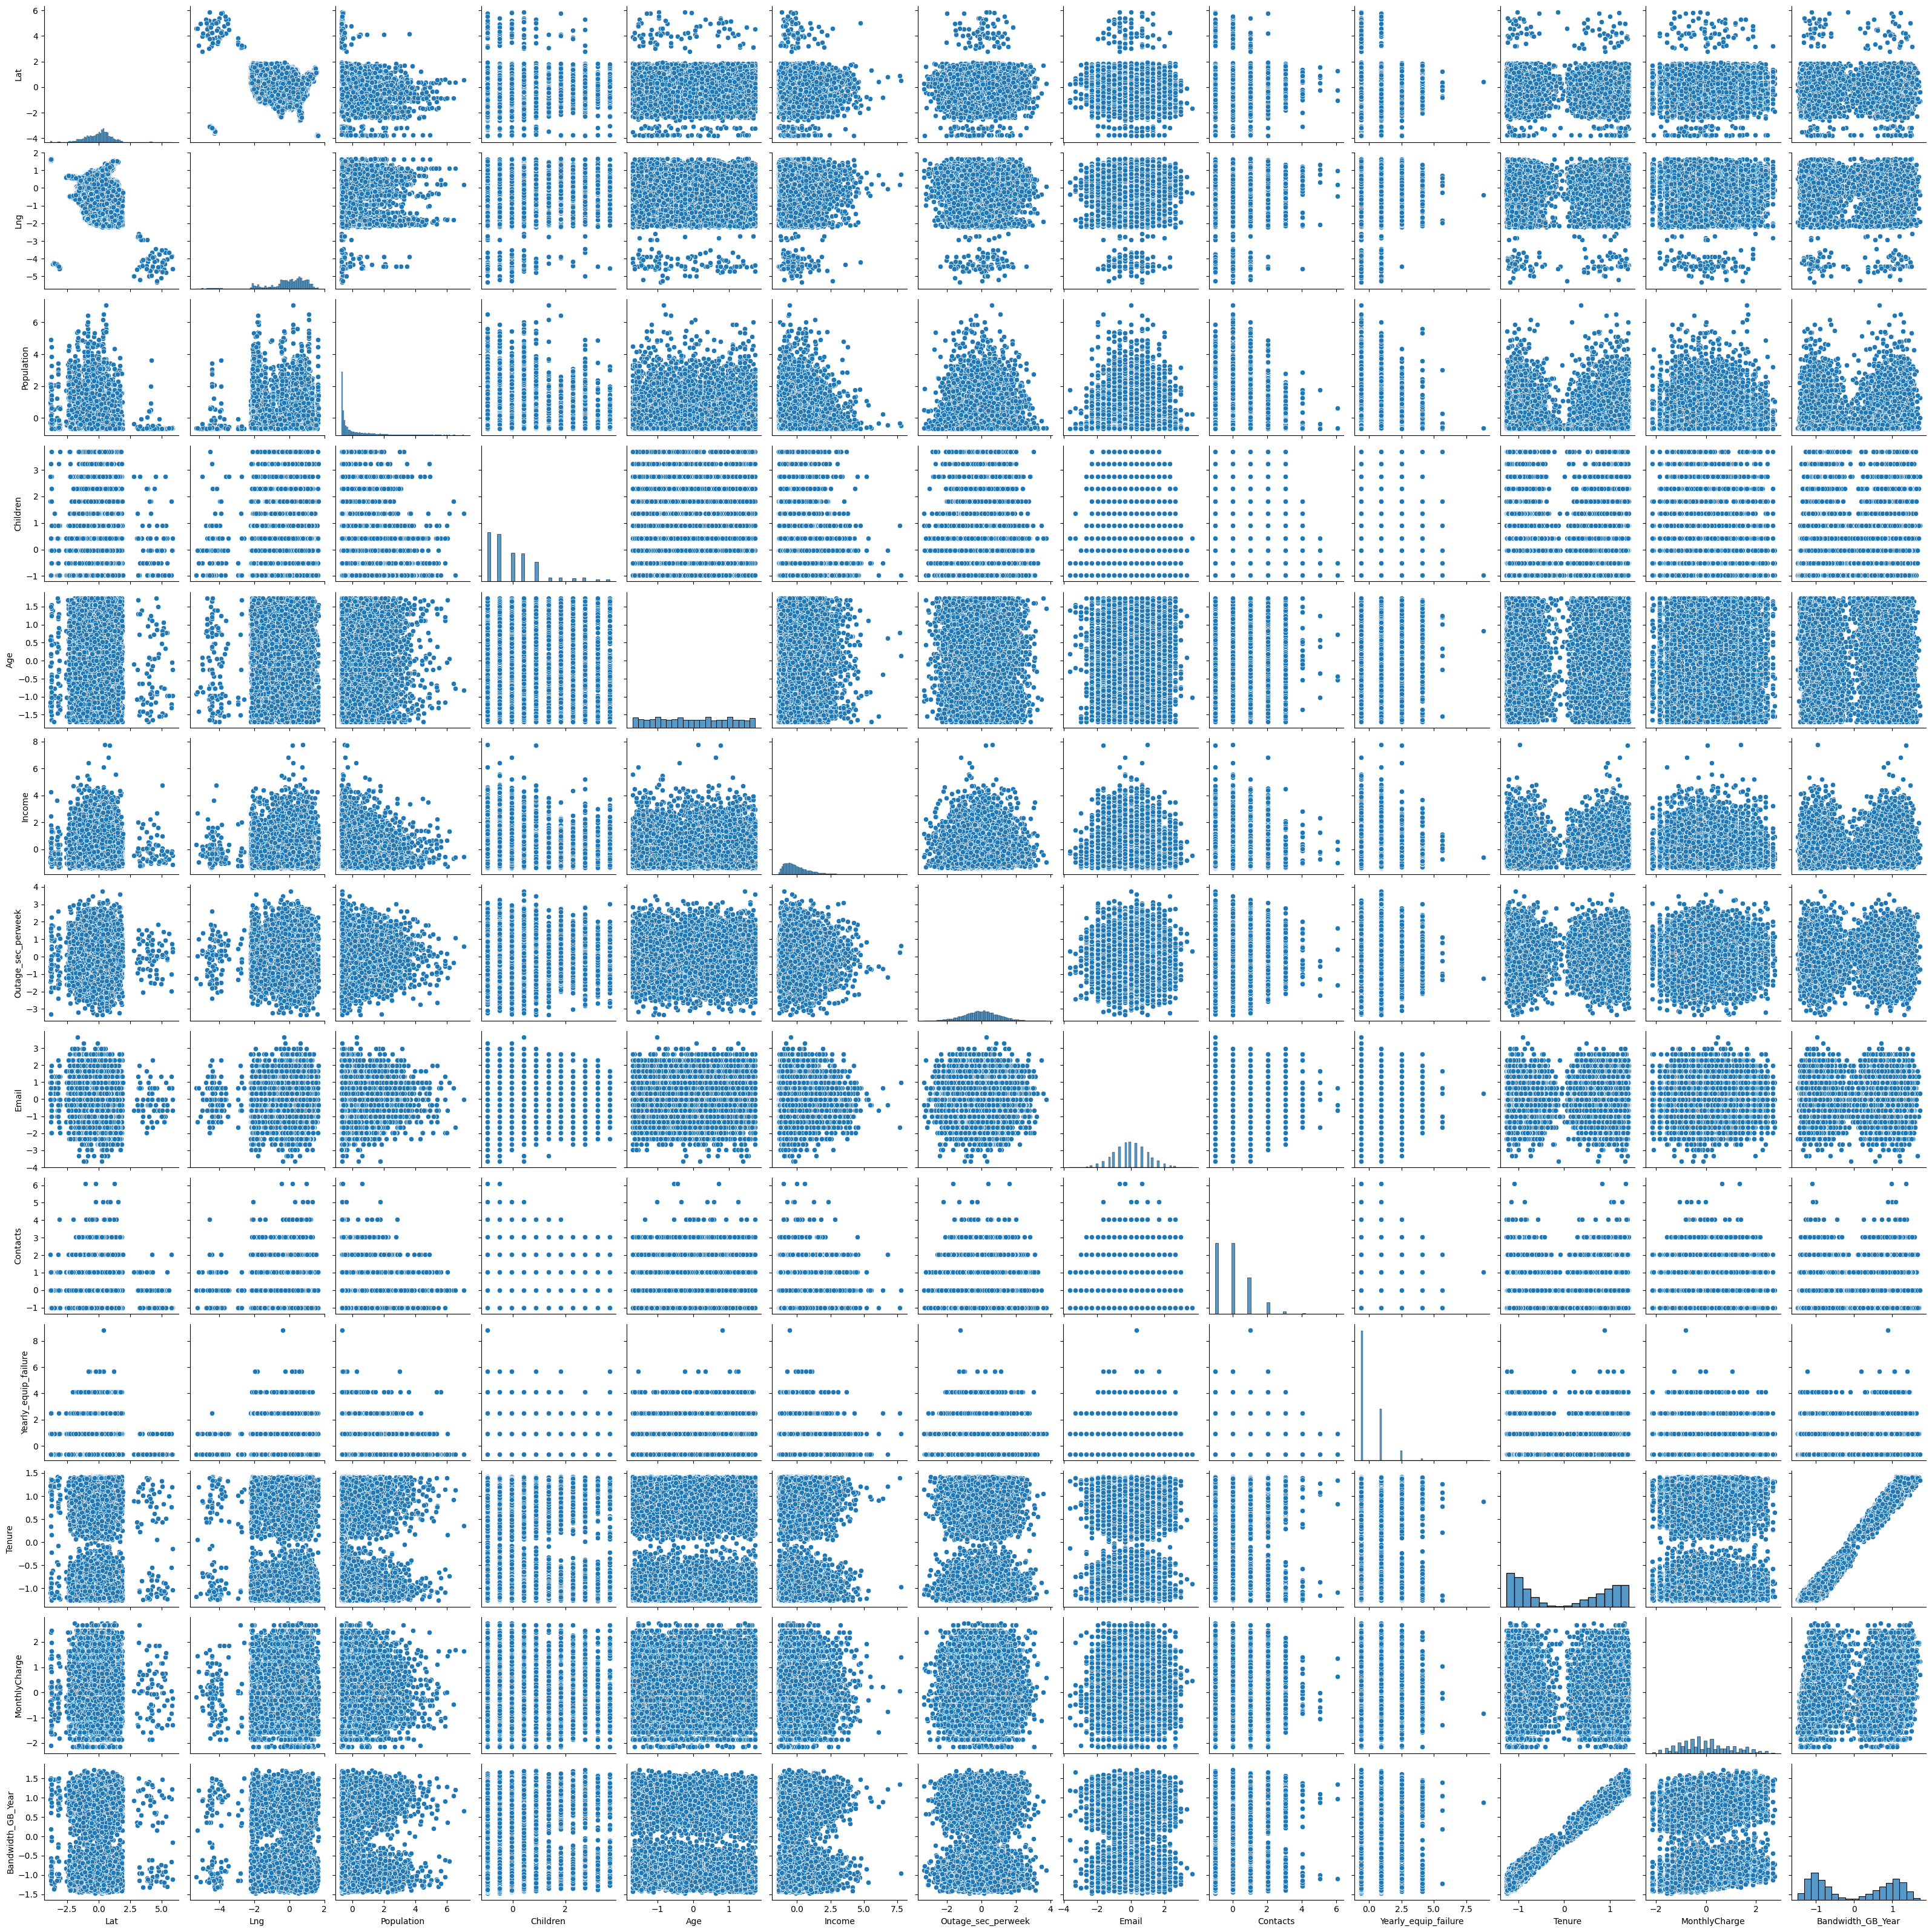

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_standardized)  # for small datasets

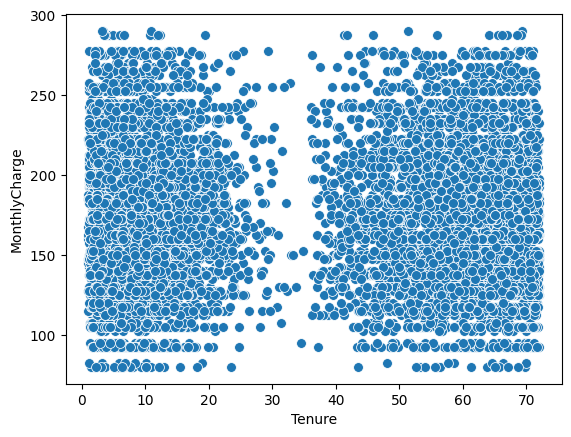

In [21]:
ax = sns.scatterplot(data = df,
                     x = "Tenure",
                     y = 'MonthlyCharge',
                     s = 50
                     )